# Low Frequency OOI hydrophone data in zarr file
<img src="https://zarr.dev/android-chrome-512x512.png" width="200">

[Zarr](https://zarr.dev/) is a cloud optimized data format that allows for exploration of large dataset.

8 years of ambient sound data measured by the low-frequency (fs=200 Hz) OOI hydrophones has been converted from the original mseed file format into zarr. This greatly increases the efficiency of exploring the hydrophone data.

In [5]:
import ooi_2025_summer_school_acoustics as oa
import pandas as pd
import xarray as xr
from dask.distributed import Client, LocalCluster
import xrsignal as xrs
from scipy import signal
#import hvplot.xarray
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

%load_ext autoreload
%autoreload 2

**open the zarr file**
- located at `/home/jovyan/ooi/rsn_cabled/SummerSchool2025/lowfrequency_hydrophone_data/ooi_lfhydrophones.zarr`

You could use
```python
fn = '/home/jovyan/ooi/rsn_cabled/SummerSchool2025/lowfrequency_hydrophone_data/ooi_lfhydrophones.zarr'
lf_hydrophones = xr.open_zarr(fn)
```
or you can use the `ooi_2025_summer_school_acoustics` helper function `open_lfhydrophones`

In [3]:
lf_hydrophones = oa.open_lfhydrophones()

### Slicing Dataset

In [4]:
hdata_slice = oa.slice_lf_hydrophones(lf_hydrophones, pd.Timestamp('2017-01-01'), pd.Timestamp('2017-01-01 T01:00:00'))

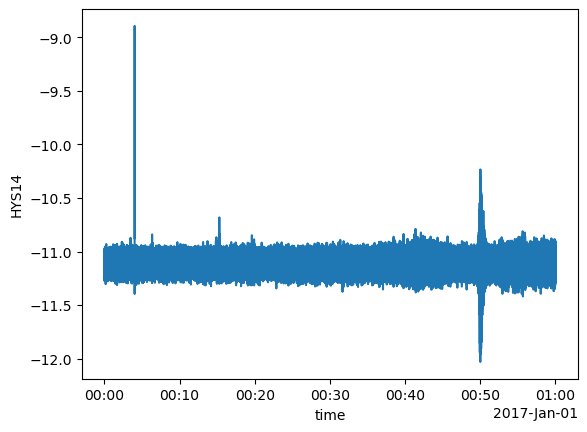

In [4]:
hdata_slice['HYS14'].plot()

## Calculate 6 month, 1 hour resolution spectrogram

In [5]:
start_time = pd.Timestamp('2018-01-01')
end_time = pd.Timestamp('2018-06-01')

data_slice = oa.slice_lf_hydrophones(lf_hydrophones, start_time, end_time, include_coord=False)

In [6]:
data_slice

<xarray.Dataset> Size: 104GB
Dimensions:  (time: 2609280000)
Dimensions without coordinates: time
Data variables:
    AXBA1    (time) float64 21GB dask.array<chunksize=(720000,), meta=np.ndarray>
    AXCC1    (time) float64 21GB dask.array<chunksize=(720000,), meta=np.ndarray>
    AXEC2    (time) float64 21GB dask.array<chunksize=(720000,), meta=np.ndarray>
    HYS14    (time) float64 21GB dask.array<chunksize=(720000,), meta=np.ndarray>
    HYSB1    (time) float64 21GB dask.array<chunksize=(720000,), meta=np.ndarray>
Attributes:
    channel:        HDH
    delta:          0.005
    network:        OO
    sampling_rate:  200
    units:          Pa

In [7]:
specs = xrs.welch(data_slice, dim='time', nperseg=2048, dB=True, fs=200)

In [ ]:
specs_computed = specs['AXCC1'].compute().assign_coords({'time':np.arange(3624)})

In [ ]:
(specs_computed + 120).hvplot.image(x='time', clim=(40,100), cmap='rocket')

## Pre-computed spectrograms
- zarr file located at `/home/jovyan/ooi/rsn_cabled/SummerSchool2025/lowfrequency_hydrophone_data/ooi_lfhydrophones.zarr`

In [6]:
import xarray as xr

In [7]:
fn = '/home/jovyan/ooi/rsn_cabled/SummerSchool2025/lowfrequency_hydrophone_data/1hr_20150101_20230101_16192pt_HPcorrected.zarr/'

In [8]:
ds = xr.open_zarr(fn)

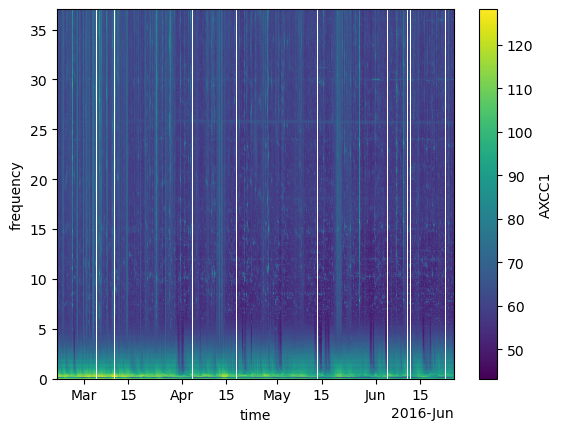

In [13]:
ds['AXCC1'][:3000,10000:13000].plot()